# Treinamento de algumas ferramentas estatísticas 

## Sobre os dados e as análises

Neste projeto, diversos conceitos de estatística são praticados em um conjunto de dados de altura, peso e obesidade de uma população. 

O conjunto apresenta as seguintes variáveis:

   - Gênero
   - Peso
   - Altura
   - BMI (indica se a pessoa está abaixo do peso, normal, com sobrepeso ou obesa)
        
Inicialmente questões sobre amostragem são exploradas e o teorema do limite central é verificado.    

Então, diversos testes de hipótese são aplicados em diferentes situações nos dados. 

## Importando as principais bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

## Carregando os dados

In [2]:
# carrega os dados
df_bmi = pd.read_csv('weight-height-bmi.csv')

In [3]:
print('Os dados contém informações sobre {} pessoas'.format(df_bmi.shape[0]))

Os dados contém informações sobre 10000 pessoas


In [4]:
df_bmi.head()

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight


In [5]:
# verifica a existência de dados faltantes
df_bmi.isnull().sum()

Gender    0
Height    0
Weight    0
BMI       0
dtype: int64

## Distribuição das alturas na população e intervalos de confiança

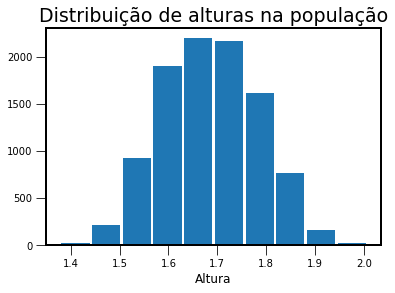

In [6]:
# cria um histograma com as alturas na população 
plt.hist(df_bmi['Height'], rwidth = .92)
plt.title('Distribuição de alturas na população', fontsize = 19)
plt.xlabel('Altura')
plt.show()

In [7]:
# calcula a altura média
mean_height = df_bmi['Height'].mean()
# calcula o desvio padrão da altura
std_height = df_bmi['Height'].std()

print('A média de altura na população é de  {:.2f} m e o desvio padrão é de {:.2f} m.'.format(mean_height, std_height))

A média de altura na população é de  1.69 m e o desvio padrão é de 0.10 m.


Conhecendo-se apenas uma amostra da população, a média populacional pode ser estimada dentro de um intervalo de confiança. O comprimento do intervalo depende do nível de confiança que se deseja. 

Em geral, determina-se um nível de confiança $(1 - \alpha)$, que representa a frequência em que o valor correto da média populacional encontra-se dentro do intervalo estipulado ao se realizar diversas amostragens. Por exemplo, um intervalo com nível de confiança de $95\%$ indica que para cada 100 amostragens o valor real da média estará dentro do intervalo determinado em 95 vezes.  

Se o desvio padrão populacional $\sigma$ for conhecido, o intervalo de confiança para a média obtida de uma amostragem com $n$ elementos é dado por:
$$
   \mu_s \pm z_{1 -\alpha} \frac{\sigma}{\sqrt{n}},
$$
onde $z_{1 -\alpha}$ (ou z-score) é o valor que determina o quantil $1 - \alpha$ da distribuição Gaussiana padrão. 

Abaixo, um exemplo de média amostral com intervalo de confiança é calculado para a altura média.

In [8]:
## média amostral e intervalo de confiança para a altura média

# tamanho da amostra
n = 30
# z-score para um nível de confiança de 95%
z = 1.96

# seleciona uma amostra de tamanho n dos dados e calcula a altura média na amostra
samp_mean = np.mean(random.sample(list(df_bmi['Height']), n))

# calcula o tamanho do intervalo
interv = z * std_height / np.sqrt(n)

print('Intervalo de confiança da amostra: {:.2f} m +/- {:.2f} m'.format(samp_mean, interv)) 

Intervalo de confiança da amostra: 1.67 m +/- 0.03 m


## Teorema do limite central aplicado na distribuição de alturas

O teorema do limite central determina que, independentemente da distribuição de uma variável aleatória, a distribuição das médias de amostras de uma variável aleatória tende a uma distribuição Gaussiana conforme o número de elementos tomados em cada amostra cresce. 

Conforme visto acima, a distribuição de alturas já é aparentemente simétrica e com distribuição próxima da normal. 

Nos gráficos a seguir, observa-se como a distribuição das médias de amostras varia conforme o número de elementos tomados em cada amostra cresce. 

In [9]:
# toma n_samples amostras de alturas contendo n elementos cada. Calcula a média de cada amostra e retorna uma
# lista com as médias
def dist_sample_height(n, n_samples = 2000):
    '''
    Parâmetros:
    : n : inteiro - Número de elementos tomados em cada amostra
    : n_samples : inteiro - Número de amostras
    '''
    
    samp_avg = []
    for i in range(n_samples):
        samp = random.sample(list(df_bmi['Height']), n)
        samp_avg.append(np.mean(samp))
        
    return samp_avg    

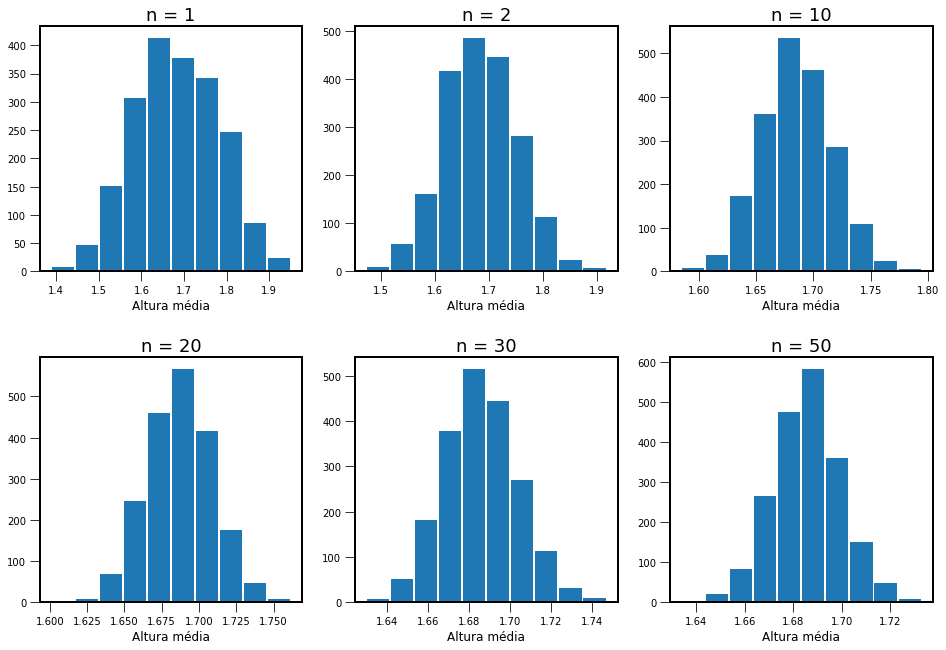

In [10]:
# gera distribuições das médias de amostras com diferentes n's e produz gráficos das distribuições

fig = plt.figure(figsize = (16, 10))

# lista com os diferentes números de elementos que são coletados em cada amostra
n_list = [1, 2, 10, 20, 30, 50]

# percorre a lista n_list e produz as distribuições das médias
for i in range(len(n_list)):
    plt.subplot(2, 3, i+1)
    plt.hist(dist_sample_height(n_list[i]), rwidth = .92)
    plt.title('n = {}'.format(n_list[i]), fontsize = 18)
    plt.xlabel('Altura média')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

O teorema do limite central garante que conforme n aumenta a distribuição das médias das amostras se torna mais próxima de uma normal.

Além disso, observa-se que o desvio padrão decresce com n.

## Intervalos de confiança com a estatística t-Student

Quando a variância populacional não é conhecida o intervalo de confiança para a estimativa de uma média pode ser calculado utilizando a distribuição t-Student.

A distribuição t-Student depende de um único parâmetro que são os graus de liberdade. Abaixo, essa distribuição é exibida para diferentes graus de liberdade. 

In [11]:
from scipy import stats

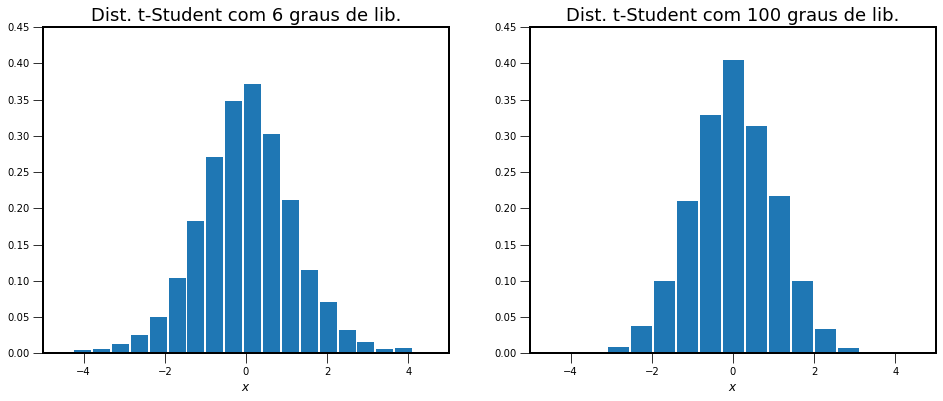

In [12]:
# constrói histogramas que seguem a distribuição t com 2 valores distintos para os graus de liberdade
fig = plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
# gera números aleatórios utilizando a distribuição t-Student de grau 6
t_dist_6 = stats.t.rvs(df = 6, size= 10000)
# constrói um histograma dos valores obtidos 
plt.hist(t_dist_6, bins=30, density=True, rwidth = 0.9)
plt.xlim(-5, 5)
plt.ylim(0, 0.45)
plt.xlabel('$x$')
plt.title('Dist. t-Student com 6 graus de lib.', fontsize = 18)

plt.subplot(1, 2, 2)
# gera números aleatórios utilizando a distribuição t-Student de grau 100
t_dist_100 = stats.t.rvs(df = 100, size= 10000)
# constrói um histograma dos valores obtidos 
plt.hist(t_dist_100, bins = 14, density=True, rwidth = 0.9)
plt.xlim(-5, 5)
plt.ylim(0, 0.45)
plt.xlabel('$x$')
plt.title('Dist. t-Student com 100 graus de lib.', fontsize = 18)

plt.show()

A distribuição t-Student possuí uma calda mais longa do que a normal. 

Conforme os graus de liberdade aumentam a distribuição se aproxima da normal.

O intervalo de confiança utilizando-se a distribuição t-Student é dado por:

$$
    \mu_s \pm t \frac{\sigma_s}{\sqrt{n}},
$$

onde agora $\sigma_s$ é o desvio padrão da amostra e $t$ é o valor correspondente ao quantil do nível de confiança desejado na distribuição t com n-1 graus de liberdade.  

In [13]:
# computa os valores correspondentes ao quantil 0.95 da distribuição t com n - 1 graus de liberdade
n = 30
stats.t(df=n-1).ppf((0.025, 0.975))

array([-2.04522964,  2.04522964])

In [14]:
# média e intervalo de confiança para a altura média

# tamanho da amostra
n = 30
# valor de t correspondente ao quantil 0.95 e 30 graus de liberdade
t = 2.04522964

# seleciona uma amostra da altura com n elementos
samp = random.sample(list(df_bmi['Height']), n)

# altura média na amostra
samp_mean = np.mean(samp)
# desvio padrão da altura na amostra
samp_std = np.mean(samp)

interv = t * samp_std / np.sqrt(n)

print('Intervalo de confiança da amostra: {:.2f} +/- {:.2f}'.format(samp_mean, interv)) 

Intervalo de confiança da amostra: 1.65 +/- 0.62


Note que o comprimento do intervalo é bem maior do que o obtido anteriormente utilizando a distribuição z.

## Testes de hipótese

### Teste bi-caudal

Neste primeiro exemplo será verificado se o valor da média obtida de uma amostra permite rejeitar um valor pré-determinado para a média de uma distribuição com desvio padrão conhecido.

In [15]:
# peso médio na população
mean_weight = df_bmi['Weight'].mean()
# desvio padrão do peso
std_weight = df_bmi['Weight'].std()

print("O peso médio e desvio padrão são respectivamente {:.2f} Kg e {:.2f} Kg.".format(mean_weight, std_weight))

O peso médio e desvio padrão são respectivamente 73.23 Kg e 14.56 Kg.


Considera-se a hipótese nula de que o peso médio da população é de $73.23$ Kg, $\mu_w = 73.23$ Kg. Escreve-se:

$$
    H_0: \mu_w = 73.23 Kg.
$$

A hipótese alternativa é a de que a média é diferente e será testado se o valor da média obtido de uma amostra de n elementos, $\mu_s$, permite rejeitar $H_0$. Assim:

$$
    H_1: \mu_s \neq \mu_w.
$$

O teste é realizado calculando-se o z-score:

$$
     \text{z-score} = \frac{(\mu_s - \mu_w)}{\frac{\sigma}{\sqrt{n}}},
$$

onde $\sigma$ é o desvio padrão na população. 

Uma vez determinado o nível de confiança (ou significância), a hipótese nula é rejeitada se o valor de z-score encontra-se na região de rejeição da distribuição z. Para um nível de confiança de 95%, que equivale a uma significância de 5%, a região de rejeição encontra-se nos valores de z da distribuição normal padrão que estão fora do percentil 95%, ou seja, para $z > 1.96$ ou $z < -1.96.$     

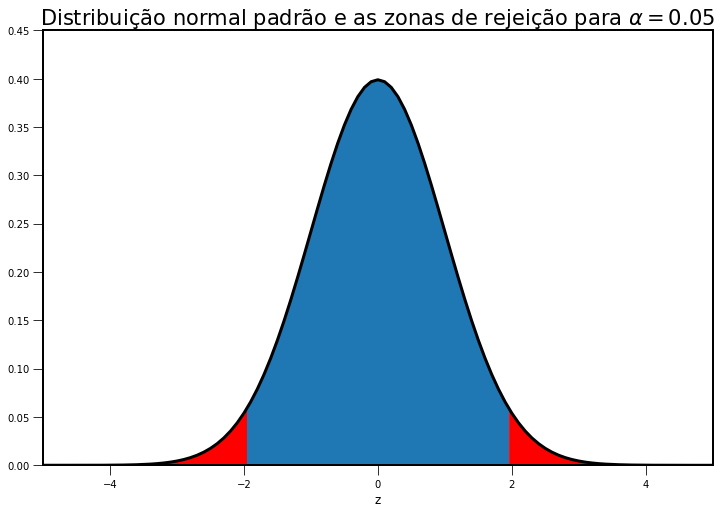

In [16]:
# desenha a distribuição normal padrão e indica as regiões de rejeição da hipótese nula
z_crit = 1.96

fig = plt.figure(figsize=(12, 8))
x = np.arange(-10, 10, 0.1)
plt.plot(x, stats.norm.pdf(x, 0, 1), color = 'k')
plt.fill_between(np.arange(-z_crit, z_crit + 0.01, 0.01), stats.norm.pdf(np.arange(-z_crit, z_crit+0.01, 0.01), 0, 1))
plt.fill_between(np.arange(-10, -z_crit, 0.01), stats.norm.pdf(np.arange(-10, -z_crit, 0.01), 0, 1), color = 'r')
plt.fill_between(np.arange(z_crit, 10, 0.01), stats.norm.pdf(np.arange(z_crit, 10, 0.01), 0, 1), color = 'r')
plt.title(r'Distribuição normal padrão e as zonas de rejeição para $\alpha = 0.05$', fontsize = 21)
plt.xlim(-5, 5)
plt.ylim(0, 0.45)
plt.xlabel('z')
plt.show()        

Na figura acima, a região em vermelho é a região de rejeição da hipótese nula. Para uma significância de 5% ($\alpha = 0.05$) a hipótese nula é rejeitada se $|\text{z-score}| > 1.96$.

De maneira informal, a significância indica o valor aceitável para a probabilidade de se estar errado ao rejeitar a hipótese nula.

In [17]:
# tamanho da amostra
n = 50

# n amostras de peso da população
samp = random.sample(list(df_bmi['Weight']), n)

# média de peso na amostra
mean_samp = np.mean(samp)

# calcula o z-score
z_score = (mean_samp - mean_weight) / (std_weight / np.sqrt(n))

z_score

-0.17716299199933216

Como $\text{|z-score|} < z_\text{crítico} = 1.96$ a hipótese nula não pode ser rejeitada.

Visualizando no gráfico, temos:

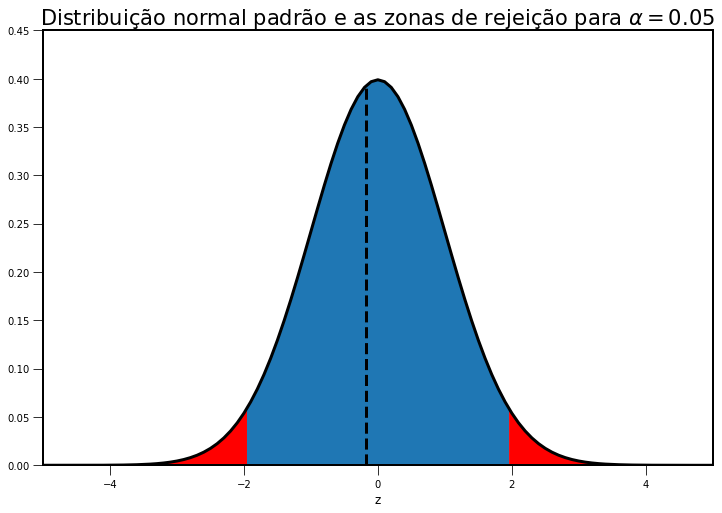

In [18]:
# desenha a distribuição normal padrão, indica as regiões de rejeição da hipótese nula e a localização do z-score
fig = plt.figure(figsize=(12, 8))
x = np.arange(-10, 10, 0.1)
plt.plot(x, stats.norm.pdf(x, 0, 1), color = 'k')
plt.fill_between(np.arange(-z_crit, z_crit + 0.01, 0.01), stats.norm.pdf(np.arange(-z_crit, z_crit+0.01, 0.01), 0, 1))
plt.fill_between(np.arange(-10, -z_crit, 0.01), stats.norm.pdf(np.arange(-10, -z_crit, 0.01), 0, 1), color = 'r')
plt.fill_between(np.arange(z_crit, 10, 0.01), stats.norm.pdf(np.arange(z_crit, 10, 0.01), 0, 1), color = 'r')
plt.vlines(z_score, 0, stats.norm.pdf(z_score, 0, 1), linestyle = '--')
plt.title(r'Distribuição normal padrão e as zonas de rejeição para $\alpha = 0.05$', fontsize = 21)
plt.xlim(-5, 5)
plt.ylim(0, 0.45)
plt.xlabel('z')
plt.show()        

O z-score está indicado pela linha tracejada vertical. Nesse caso o z-score está bastante distante dos valores críticos do teste.

Um outro parâmetro importante no teste é o valor p (p-value). Ele fornece a probabilidade da estatística de teste ser equivalente ou mais extrema àquela obtida dos dados dado que a hipótese nula seja verdadeira. Ele é calculado como:

$$
     \text{p-value} = 1 - \text{Prob}\{- z_\text{score} < z < z_\text{score}\} =  2 \ \text{Prob}\{z > |z_\text{score}|\}.
$$

No exemplo acima temos o seguinte valor p:

In [19]:
# calcula o p-value
p_value = stats.norm.sf(abs(z_score))*2
p_value

0.8593803639026568

Esse valor está bem acima da significância pré-determinada e, portanto, a hipótese nula não pode ser rejeitada.

### Teste t para diferença de médias de duas amostras independentes

Esse primeiro teste será realizado nos dados sobre as alturas na população e a hipótese nula é a de que a altura média das mulheres, $\mu_\text{wom},$ é menor do que a dos homens, $\mu_\text{men}$.

O teste é assim definido por:

$$
    H_0: \mu_\text{wom} = \mu_\text{men}
$$
$$
    H_1: \mu_\text{wom} < \mu_\text{men}
$$

Esse é um teste unilateral.

In [20]:
# gera uma pandas series com as médias de altura de mulheres e homens
means = df_bmi.groupby('Gender').mean()['Height']
# gera uma pandas series com os desvios padrão da altura de mulheres e homens
stds = df_bmi.groupby('Gender').std()['Height']

mean_wom, mean_men = means
std_wom, std_men = stds

print('A média de altura dos homens é de {:.2f} m  e a das mulheres é {:.2f} m.'.format(mean_men,mean_wom))

A média de altura dos homens é de 1.75 m  e a das mulheres é 1.62 m.


Na figura abaixo as distribuições de alturas de homens e mulheres são mostradas: 

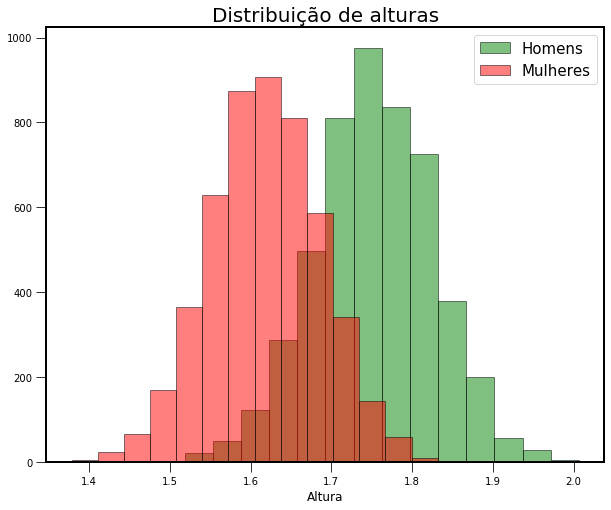

In [21]:
fig = plt.figure(figsize = (10, 8))
plt.hist(df_bmi[df_bmi['Gender'] == 'Male']['Height'], bins = 15, color = 'green', edgecolor = 'k', alpha = 0.5, label = 'Homens')
plt.hist(df_bmi[df_bmi['Gender'] == 'Female']['Height'], bins = 15, color = 'r', edgecolor = 'k', alpha = 0.5, label = 'Mulheres')
plt.legend(prop={'size': 15})
plt.xlabel('Altura')
plt.title('Distribuição de alturas', fontsize = 20)
plt.show()

Nesse tipo de teste a estatística utilizada é baseada na distribuição t. 

Calcula-se o valor $t_\text{calc}$ para o teste, que é dado por:

$$
    t_\text{calc} = \frac{(\mu_\text{wom} - \mu_\text{man})}{\sqrt{\frac{\sigma_\text{wom}^2}{n_\text{wom}} + \frac{\sigma_\text{men}^2}{n_\text{men}}}}
$$

e também os graus de liberdade:

$$
    \text{Graus de lib.} = \frac{(\sigma_\text{wom}^2/n_\text{wom} + \sigma_\text{men}^2/n_\text{men})^2}{\frac{(\sigma_\text{wom}^2/n_\text{wom})^2}{n_\text{wom} - 1} + \frac{(\sigma_\text{men}^2/n_\text{men})^2}{n_\text{men} - 1}}.
$$

De forma similar ao que foi feito anteriormente, deve-se então definir o nível de confiança desejado e identificar os valores críticos de $t$ correspondentes na distribuição t com esses graus de liberdade. 

Nesse teste unilateral a hipótese nula é rejeitada se $t_\text{calc} < t_\text{crítico}$

In [22]:
# número de dados de homens
n_men = sum(df_bmi['Gender'] == 'Male')
# número de dados de mulheres
n_wom = sum(df_bmi['Gender'] == 'Female')

# cálculo do t_calc nesse caso
t_calc = (mean_wom - mean_men) / np.sqrt(std_wom**2/n_wom + std_men**2/n_men)
# cálculo dos graus de liberdade
df = (std_wom**2/n_wom + std_men**2/n_men)**2 / ((std_wom**2/n_wom)**2 / (n_wom - 1) + (std_men**2/n_men)**2 / (n_men - 1))

In [23]:
print('Tem-se nesse caso t_calc = {:.2f} e Graus de lib. = {:.2f}.'.format(t_calc, df))

Tem-se nesse caso t_calc = -95.60 e Graus de lib. = 9962.08.


In [24]:
# computa os valores correspondentes ao quantil 0.95 da distribuição t com n graus de liberdade
n = df
stats.t(df=df).ppf((0.05, 0.99999))

array([-1.6450066 ,  4.26694546])

Aqui, $t_\text{crítico} = -1.64$.

Como tem-se um teste unilateral à esquerda, $t_\text{crítico}$ é obtido tal que $\text{Prob}\{-\infty < t < t_\text{crítico}\} = 0.05$.

Como $t_\text{calc} = -95.6$, tem-se $t_\text{calc} < t_\text{crítico}$ e a hipótese nula é rejeitada.

Pode-se afirmar, portanto, que a altura média das mulheres é menor do que a dos homens.

Abaixo está ilustrada a distribuição t e a região de rejeição para o teste unilateral.

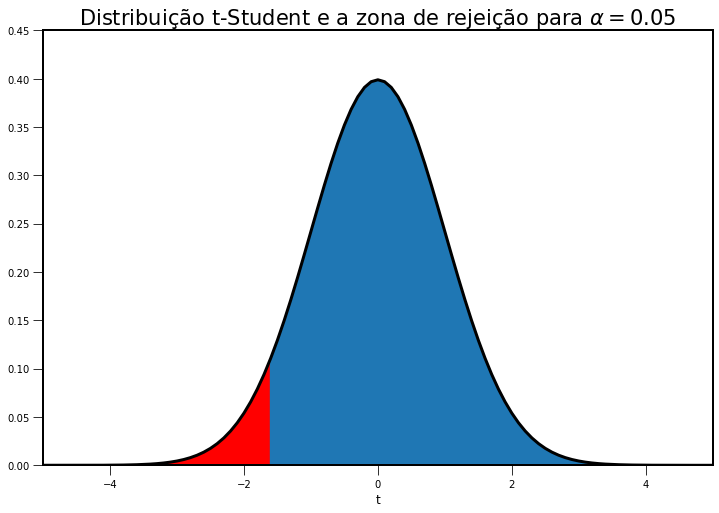

In [25]:
# desenha a distribuição t-Student, indica a região de exclusão de um teste unilateral com significância de 5%
t_crit = -1.64

fig = plt.figure(figsize=(12, 8))
x = np.arange(-10, 10, 0.1)
plt.plot(x, stats.t.pdf(x, df), color = 'k')
plt.fill_between(np.arange(t_crit, 10, 0.01), stats.t.pdf(np.arange(t_crit, 10, 0.01), df))
plt.fill_between(np.arange(-10, t_crit + 0.01, 0.01), stats.t.pdf(np.arange(-10, t_crit+0.01, 0.01), df), color = 'r')
plt.title(r'Distribuição t-Student e a zona de rejeição para $\alpha = 0.05$', fontsize = 21)
plt.xlim(-5, 5)
plt.ylim(0, 0.45)
plt.xlabel('t')
plt.show()        

In [26]:
# p-value do teste unilateral  
p_value = stats.t.sf(abs(t_calc), df)
p_value

0.0

O p-value é baixissímo e a chance de se estar errado ao rejeitar a hipótese nula é praticamente zero.

## Teste $\chi^2$ para independência entre variáveis categóricas

Agora a independência entre variáveis categóricas será testada.  

A primeira hipótese testada será se a obesidade está associada com algum dos sexos.

Define-se assim as hipóteses:

$$
    H_0: \text{Não existe associação significativa entre ser obeso e ser do sexo masculino.}
$$
$$
    H_1: \text{Existe associação significativa entre ser homem e ser obeso.}
$$

Os dados apresentam uma categoria de sobrepeso ('Overweight') e outra categoria de obeso ('Obesity'). Inicialmente o teste se aplicará apenas aos classificados como obesos. 

Primeiramente será criada uma nova variável informando se o indivíduo é obeso ou não.

In [27]:
def obesity(x):
    '''
    :x : string
     
    Recebe a string x e retorna 'Obese' se o indivíduo é obeso 
    e 'Not obese' se não for obeso. 
    
    '''
            
    if x == 'Obesity':
        return 'Obese'
    else:
        return 'Not obese'

# cria a nova coluna 'obesity' contendo a informação se o indivíduo é obeso ou não    
df_bmi['obesity'] = df_bmi['BMI'].apply(obesity)    

Para realizar o teste monta-se a seguinte matriz de contingência.

In [28]:
# monta a matriz de contingência indicando o número de pessoas obesas e não obesas discriminadas pelo sexo 
cross_tab = pd.crosstab(df_bmi['Gender'], df_bmi['obesity'], margins = True)
cross_tab

obesity,Not obese,Obese,All
Gender,,,
Female,5000,0,5000
Male,4745,255,5000
All,9745,255,10000


Essa matriz contém as frequências observadas e precisa-se agora montar a matriz "esperada", com elementos $E_{ij}$.

A matriz esperada é construída de tal forma que a incidência de obesidade nos sexos reflita a frequência na população. 

Tem-se:

$$
    E_{ij} = \frac{n_i n_j}{n}
$$

onde $n_i$ é o número de elementos na linha $i$ e $n_j$ é o número de elementos na coluna $j$. $n$ é a quantidade total de observações.

In [29]:
# inicia a matriz esperada com zeros
E = np.zeros((2, 2))

In [30]:
# atribui os elementos da matriz esperada conforme a relação acima
for i in range(2):
    for j in range(2):
        E[i, j] = (cross_tab.iloc[i, :].sum())*(cross_tab.iloc[:, j].sum()) / 10000

In [31]:
# matriz esperada
E

array([[19490.,   510.],
       [19490.,   510.]])

O teste $\chi^2$ é realizado computando a distância entre as matrizes observada e esperada através da expressão:

$$
    \chi^2_\text{calculado} = \sum_{i = 1}^2 \sum_{j = 1}^2 \frac{(O_{ij} - E_{ij})^2}{E_{ij}}.
$$

A hipótese nula é então rejeitada se $\chi^2_\text{calculado}$ encontra-se na região de rejeição da distribuição $\chi^2$ com d graus de liberdade, onde $d =(\text{n. linhas} - 1).(\text{n. colunas} - 1)$. Nesse caso $d = (2 -1)(2 -1) = 1.$



In [32]:
# calcula o valor de qui quadrado 
chi2_calc = 0

for i in range(2):
    for j in range(2):
        chi2_calc += (cross_tab.iloc[i, j].sum() - E[i, j])**2 / E[i, j]
        
chi2_calc

22565.418163160593

In [33]:
# computa os valores correspondentes ao quantil 0.95 da distribuição qui quadrado com n graus de liberdade
n = 1
stats.chi2(df=1).ppf((0., 0.95))

array([0.        , 3.84145882])

O valor crítico é portanto $\chi^2_{crítico} = 3.84.$ 

Como $\chi^2_{calc} = 22565.42$, tem-se $\chi^2_{calc} > \chi^2_{crítico}$ e a hipótese nula é rejeitada. Concluí-se então que existe uma relação entre obesidade e sexo.

Abaixo, a distribuição $\chi^2$ com 1 grau de liberdade é ilustrada e a região de rejeição indicada.  

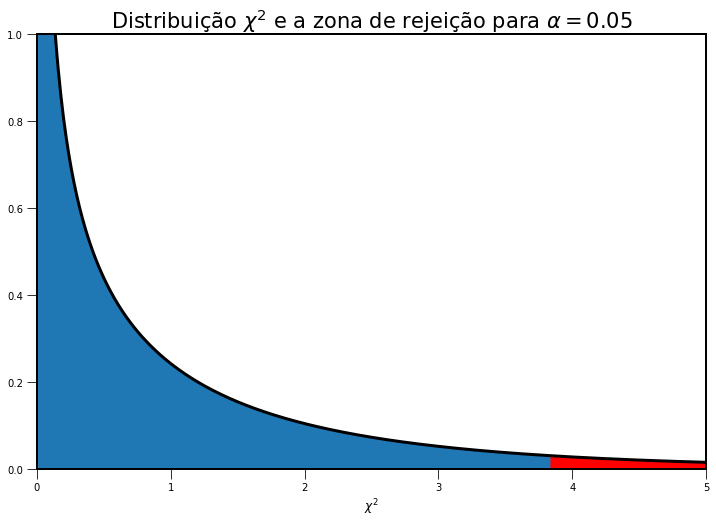

In [34]:
# desenha a distribuição qui quadrado com 1 grau de liberdade e indica a região de exclusão com significância de 5%
chi2_crit = 3.84

fig = plt.figure(figsize=(12, 8))
x = np.arange(0, 10, 0.01)
plt.plot(x, stats.chi2.pdf(x, 1), color = 'k')
plt.fill_between(np.arange(0, chi2_crit + 0.01, 0.01), stats.chi2.pdf(np.arange(0, chi2_crit + 0.01, 0.01), 1))
plt.fill_between(np.arange(chi2_crit, 10, 0.01), stats.chi2.pdf(np.arange(chi2_crit, 10, 0.01), 1), color = 'r')
plt.title(r'Distribuição $\chi^2$ e a zona de rejeição para $\alpha = 0.05$', fontsize = 21)
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.xlabel('$\chi^2$')
plt.show()        

In [35]:
# p-value do teste
p_value = 1 - stats.chi2.cdf(chi2_calc, 1)
p_value

0.0

O p-value é praticamente nulo e o teste tem um alto grau de confiabilidade.

A seguir, o teste será extendido para considerar indivíduos obesos ou com sobrepeso. Em ambos os casos o indivíduo será classificado como sobrepeso. 

In [36]:
def overweight(x):
    '''
    :x : string
    
    Recebe a string x e retorna 'Overweight' se x = 'Obesity' ou x = 'Overweight', 
    e retorna 'Not overweight' caso contrário.
    
    '''
    
    if x == 'Obesity' or x == 'Overweight':
        return 'Overweight'
    else:
        return 'Not overweight'

# cria uma nova coluna indicando se o indivíduo está com sobrepeso    
df_bmi['overweight'] = df_bmi['BMI'].apply(overweight)    

In [37]:
# cria a matriz de contingência nesse caso indicando a quantidade de indivíduos com sobrepeso,
#discriminados pelo sexo
cross_tab = pd.crosstab(df_bmi['Gender'], df_bmi['overweight'], margins = True,)
cross_tab

overweight,Not overweight,Overweight,All
Gender,,,
Female,3929,1071,5000
Male,227,4773,5000
All,4156,5844,10000


In [38]:
# computa a matriz esperada nesse caso
E = np.zeros((2, 2))

for i in range(2):
    for j in range(2):
        E[i, j] = (cross_tab.iloc[i, :-1].sum())*(cross_tab.iloc[:-1, j].sum()) / 10000

In [39]:
E

array([[2078., 2922.],
       [2078., 2922.]])

In [40]:
# calcula o valor de qui quadrado para o teste
chi2_calc = 0

for i in range(2):
    for j in range(2):
        chi2_calc += (cross_tab.iloc[i, j].sum() - E[i, j])**2 / E[i, j]
        
chi2_calc

5642.701578875598

Novamente, pode-se então afirmar que o sobrepeso está fortemente relacionado ao sexo.

In [41]:
# p-value para o teste
p_value = 1 - stats.chi2.cdf(chi2_calc, 1)
p_value

0.0